## VISUALIZACION I

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.
📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('files/attacks1.csv')

- Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1) ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [4]:
categorias_sex = df['sex'].value_counts() 

In [5]:
type(categorias_sex)

pandas.core.series.Series

In [6]:
sex = pd.DataFrame(categorias_sex)
print('La frecuencia de las categorias de la column sex son:')
sex

La frecuencia de las categorias de la column sex son:


,sex
M,4939
F,619
M,2
N,2
lli,1
.,1


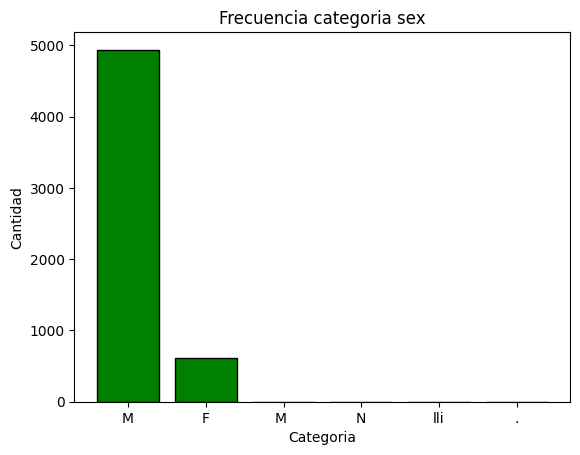

In [92]:
plt.figure()

 
plt.bar(sex.index, sex['sex'], color='green', edgecolor= 'black')

plt.title('Frecuencia categoria sex')
plt.ylabel('Cantidad')
plt.xlabel('Categoria')

plt.show();

2) ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.


In [95]:
x = pd.DataFrame([df.isnull().sum()]).T
print('La cantidad de nulos por columnas es:')
x

La cantidad de nulos por columnas es:


,0
case_number,1
year,0
type,4
country,40
area,408
location,488
activity,511
name,200
sex,550
age,2666


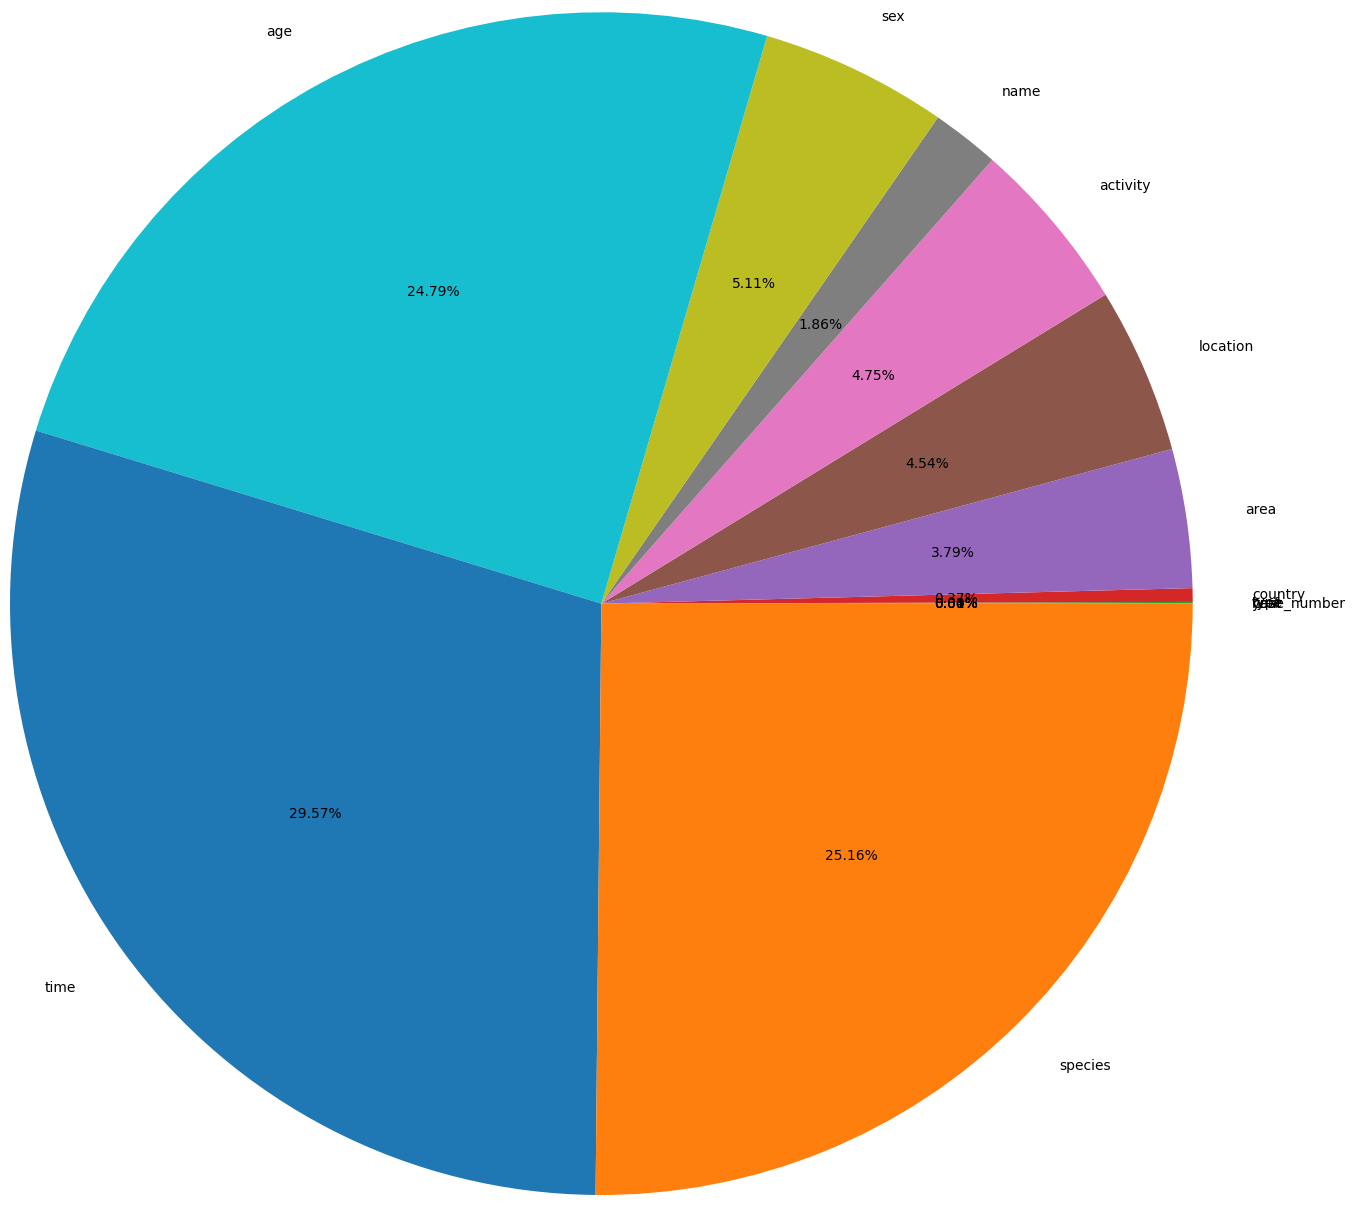

In [99]:
#Creamos un pie chart para ver los porcentajes de nulos por columna.

plt.figure()


plt.pie(x[0], labels=x.index, radius= 4, autopct= '%1.2f%%')


plt.show();

3) ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?



In [66]:
columnas_cat = df.describe(include= 'object').T # Buscamos el dato de valores unicos de columnas categoricas.
columnas_cat

,count,unique,top,freq
case_number,6113,6113,2018.06.25,1
type,6110,8,Unprovoked,4438
country,6074,201,USA,2200
area,5706,791,Florida,1025
location,5626,4020,"New Smyrna Beach, Volusia County",162
activity,5603,1484,Surfing,966
name,5914,5118,male,511
sex,5564,6,M,4939
age,3448,156,17,154
time,2934,366,Afternoon,183


In [67]:
valores_unicos =pd.DataFrame(columnas_cat['unique']) # del DataFrame anterior filtramos la columna que nos cuenta la cantidad de valores unicos y lo convertimos a DataFrame
valores_unicos

,unique
case_number,6113
type,8
country,201
area,791
location,4020
activity,1484
name,5118
sex,6
age,156
time,366


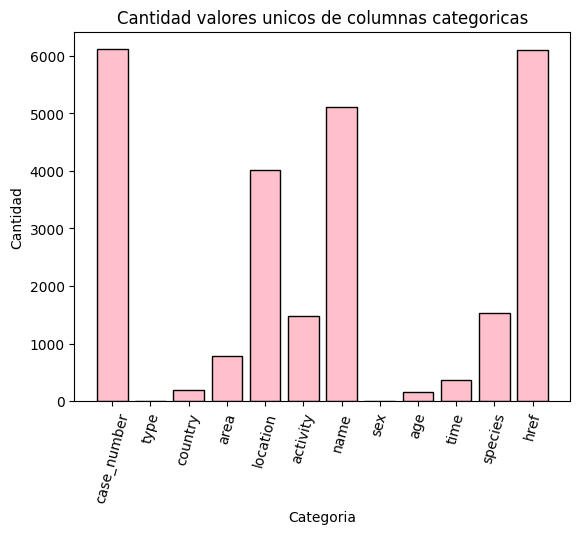

In [101]:
x= valores_unicos.index 
y = valores_unicos['unique']

plt.figure()

plt.bar(x, y, color='pink', edgecolor= 'black')
plt.xticks(rotation= 75)

plt.title('Cantidad valores unicos de columnas categoricas')
plt.ylabel('Cantidad')
plt.xlabel('Categoria')


plt.show();

4. Filtrad los datos para quedarnos solo con los datos de USA.

In [69]:
df_usa = df[df['country']== 'USA']


- ¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [80]:
ataques_usa = df_usa[(df_usa['year']>2000)]
ataques_usa['year'].unique()

array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.])

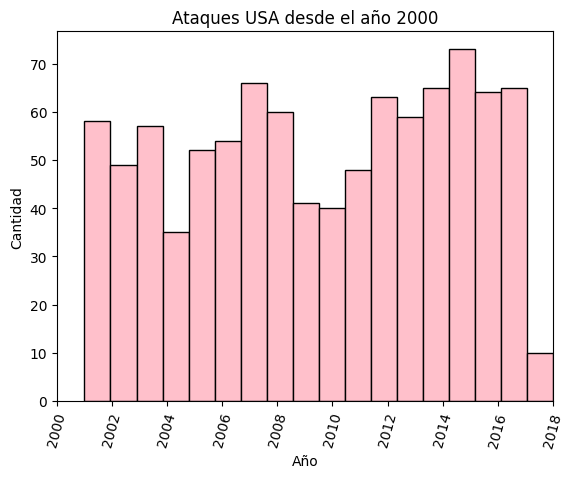

In [102]:
x= ataques_usa['year']


plt.figure()

plt.hist(x, facecolor  = 'pink', edgecolor = "black", bins=18 )

plt.xticks(rotation= 75)
plt.xlim(2000, 2018)

plt.title('Ataques USA desde el año 2000')
plt.ylabel('Cantidad')
plt.xlabel('Año')

plt.show();

-  En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.


In [85]:
tipo= pd.DataFrame(ataques_usa['type'].value_counts())
tipo

,type
Unprovoked,797
Invalid,65
Provoked,60
Boating,32
Boat,3
Sea Disaster,2


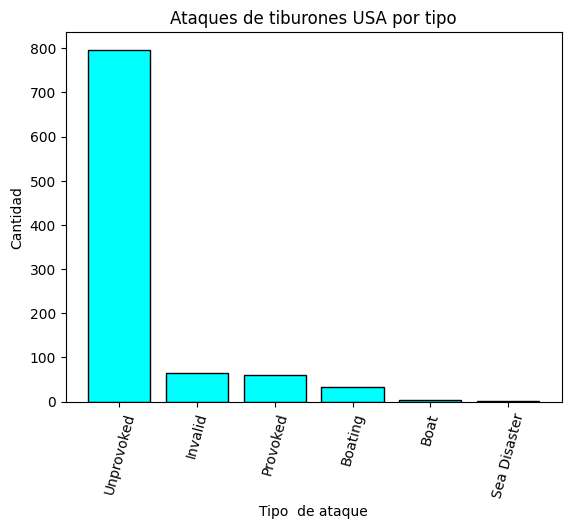

In [103]:
x= tipo.index 
y = tipo['type']

plt.figure()

plt.bar(x, y, color='aqua', edgecolor='black')
plt.xticks(rotation= 75)

plt.title('Ataques de tiburones USA por tipo')
plt.ylabel('Cantidad')
plt.xlabel('Tipo  de ataque')


plt.show();

5) Filtrad los datos para Spain:


In [87]:
df_esp = df[df['country']== 'SPAIN']

- ¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.


In [88]:
ataques_esp = df_esp[(df_esp['year']>2000)]


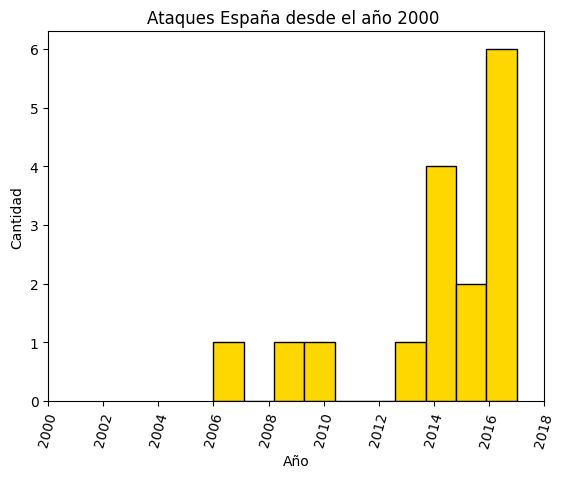

In [104]:
x= ataques_esp['year']


plt.figure()

plt.hist(x,facecolor  = 'gold', edgecolor = "black" )

plt.xticks(rotation= 75)
plt.xlim(2000, 2018)

plt.title('Ataques España desde el año 2000 ')
plt.ylabel('Cantidad')
plt.xlabel('Año')

plt.show();

- En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.


In [90]:
tip_esp= pd.DataFrame(ataques_esp['type'].value_counts())
tip_esp

,type
Unprovoked,9
Invalid,5
Provoked,2


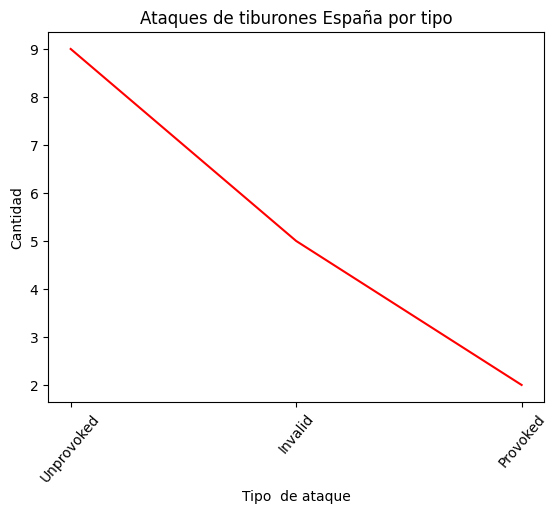

In [105]:
x= tip_esp.index 
y = tip_esp['type']

plt.figure()

plt.plot(x, y, color='red')
plt.xticks(rotation= 50)

plt.title('Ataques de tiburones España por tipo')
plt.ylabel('Cantidad')
plt.xlabel('Tipo  de ataque')


plt.show();